In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Paths to folders
path_columns = "data/BY_COLUMNS_GENERATED-MAG1C"
whole_image = "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.1_SPED-UP_PRECISION-64_2122-2488_SELECT-ALL_CHANNEL-N-72/ang20191018t141549_r3900_c244_w151_h151"
original = "data/WHOLE_IMAGE_STARCOP-MAG1C"

# Filenames to process
filenames = ["ace.npy", "cem.npy", "label.npy", "mag1c.npy", "mf.npy"]

# Get all subfolders in the column path
subfolders = [f for f in os.listdir(path_columns) if os.path.isdir(os.path.join(path_columns, f))]
#subfolders.sort()  # Ensure sorted order

# Select subfolder based on index_to_plot
index_to_plot = 330
if index_to_plot >= len(subfolders):
    raise ValueError(f"Index {index_to_plot} is out of range. Only {len(subfolders)} subfolders available.")

subfolder = subfolders[index_to_plot]
subfolder = "ang20191018t174629_r18432_c0_w512_h512"
print(f"Plotting for subfolder: {subfolder}")

# Loop through all specified filenames
for filename in filenames:
    file_column = os.path.join(path_columns, subfolder, filename)
    file_whole = os.path.join(whole_image, subfolder, filename)
    file_original = os.path.join(original, subfolder, filename)

    # Load data if file exists, otherwise set to None
    data_column = np.load(file_column) if os.path.exists(file_column) else None
    data_whole = np.load(file_whole) if os.path.exists(file_whole) else None
    data_original = np.load(file_original) if os.path.exists(file_original) else None

    # Plot based on the file type
    if filename in ["ace.npy", "cem.npy", "mf.npy"]:  # Two images (columns vs whole)
        if data_column is not None and data_whole is not None:
            fig, axes = plt.subplots(1, 2, figsize=(12, 6))
            axes[0].imshow(data_whole, cmap='viridis', interpolation='nearest')
            axes[0].set_title(f"{filename}")
            axes[1].imshow(data_whole > 0.004, cmap='viridis', interpolation='nearest')
            axes[1].set_title(f"{filename} Thresholded")
            for ax in axes:
                ax.axis("off")
            plt.colorbar(axes[0].images[0], ax=axes, fraction=0.02)
            plt.show()

    elif filename == "mag1c.npy":  # Three images (columns, whole, original)
        if data_column is not None and data_whole is not None and data_original is not None:
            fig, axes = plt.subplots(1, 3, figsize=(18, 6))
            axes[0].imshow(data_whole, cmap='viridis', interpolation='nearest')
            axes[0].set_title("MAG1C ")
            axes[1].imshow(data_whole > 500, cmap='viridis', interpolation='nearest')
            axes[1].set_title("MAG1C (Whole Image)")
            axes[2].imshow(data_original > 500, cmap='viridis', interpolation='nearest')
            axes[2].set_title("MAG1C (Original)")
            for ax in axes:
                ax.axis("off")
            plt.colorbar(axes[0].images[0], ax=axes, fraction=0.02)
            plt.show()

    elif filename == "label.npy":  # Single image (from any path)
        if data_column is not None:
            plt.figure(figsize=(6, 6))
            plt.imshow(data_column, cmap='viridis', interpolation='nearest')
            plt.title("Label Image")
            plt.axis("off")
            plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/BY_COLUMNS_GENERATED-MAG1C'

In [ ]:
spectrum = np.load("spectrum.npy")
centers = np.load("centers.npy")
print(spectrum)
print(centers)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9999.0..32.291378].


-9999.0 37.493042


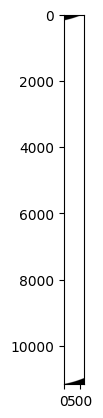

In [2]:
import spectral
import matplotlib.pyplot as plt
path = "ang20191021t171902_rdn_v2x1/ang20191021t171902_rdn_v2x1_img"

rdn_file = spectral.io.envi.open(path + ".hdr", path)
rdn_file_npy = rdn_file.load()
print(rdn_file_npy.min(), rdn_file_npy.max())
plt.imshow(rdn_file_npy[:,:,[30,20,10]])

0.0 5.2797136


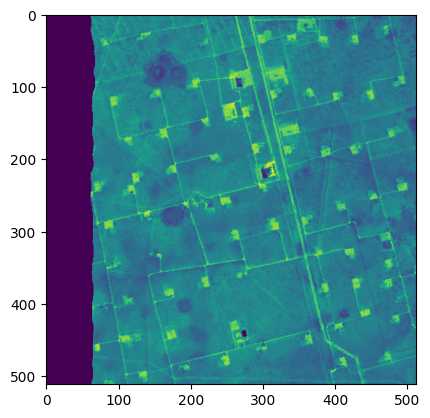

In [4]:
import tifffile as tiff
import matplotlib.pyplot as plt

file = tiff.imread("/home/jherec/starcop_big/STARCOP_allbands/ang20191025t171141_r10528_c126_w151_h151/TOA_AVIRIS_2194nm.tif")
print(file.min(), file.max())
plt.imshow(file)

In [16]:
import spectral.io.envi as envi
import numpy as np
file = envi.open("ang20191021t171902_rdn_v2x1/ang20191021t171902_rdn_v2x1_img.hdr", "ang20191021t171902_rdn_v2x1/ang20191021t171902_rdn_v2x1_img")
print(file.metadata)
wavelength = file.metadata["wavelength"]
fwhm = file.metadata["fwhm"]
wavelength = [float(f) for f in wavelength]
fwhm = [float(f) for f in fwhm]
print(wavelength)
print(fwhm)

{'description': 'AVIRIS-NG Measured Radiances in uW nm-1 cm-2 sr-1', 'samples': '616', 'lines': '11164', 'bands': '425', 'header offset': '0', 'file type': 'ENVI', 'data type': '4', 'interleave': 'bil', 'byte order': '0', 'map info': ['UTM', '1', '1', '688980.631507', '3588742.29041', '7.3', '7.3', '13', 'North', 'WGS-84', 'units=Meters', 'rotation=-55.0000000'], 'crosstrack scatter file': '/home/winstono/isat-dev/ang/cal/data/20170125_via_ang20160925t182412_crf', 'wavelength units': 'Nanometers', 'flat field file': '/home/winstono/isat-dev/ang/cal/data/20180727_ang20180628_BLUSS_avg_rows300-340_ff', 'wavelength file': '/home/winstono/isat-dev/ang/cal/data/20190111_ang20180325t061759_wavelength_fit_full.txt', 'wavelength': ['376.719576', '381.729576', '386.739576', '391.749576', '396.749576', '401.759576', '406.76957600000003', '411.77957599999996', '416.789576', '421.799576', '426.80957600000005', '431.819576', '436.819576', '441.829576', '446.839576', '451.84957599999996', '456.85957

In [6]:
import numpy as np
spectrum = np.load("aviris_mag1c_spectrum.npy")
centres = np.load("aviris_mag1c_centers.npy")
for x,y in zip(spectrum, centres):
    print(x,y)

0.0 376.719576
0.0 381.729576
0.0 386.739576
0.0 391.749576
0.0 396.749576
0.0 401.759576
0.0 406.76957600000003
0.0 411.77957599999996
0.0 416.789576
0.0 421.799576
0.0 426.80957600000005
0.0 431.819576
0.0 436.819576
0.0 441.829576
0.0 446.839576
0.0 451.84957599999996
0.0 456.859576
0.0 461.869576
0.0 466.87957600000004
0.0 471.87957600000004
0.0 476.889576
0.0 481.899576
0.0 486.909576
0.0 491.919576
0.0 496.929576
0.0 501.93957600000005
0.0 506.94957600000004
0.0 511.94957600000004
0.0 516.959576
0.0 521.9695760000001
0.0 526.979576
0.0 531.9895759999999
0.0 536.999576
0.0 542.009576
0.0 547.009576
0.0 552.0195759999999
0.0 557.029576
0.0 562.039576
0.0 567.049576
0.0 572.059576
0.0 577.069576
0.0 582.0795760000001
0.0 587.0795760000001
0.0 592.089576
0.0 597.099576
0.0 602.1095760000001
0.0 607.1195759999999
0.0 612.1295759999999
0.0 617.139576
0.0 622.139576
0.0 627.149576
0.0 632.1595759999999
0.0 637.169576
0.0 642.179576
0.0 647.189576
0.0 652.199576
0.0 657.209576
0.0 662.20

Plotting for subfolder: ang20191018t144405_r2674_c436_w151_h151


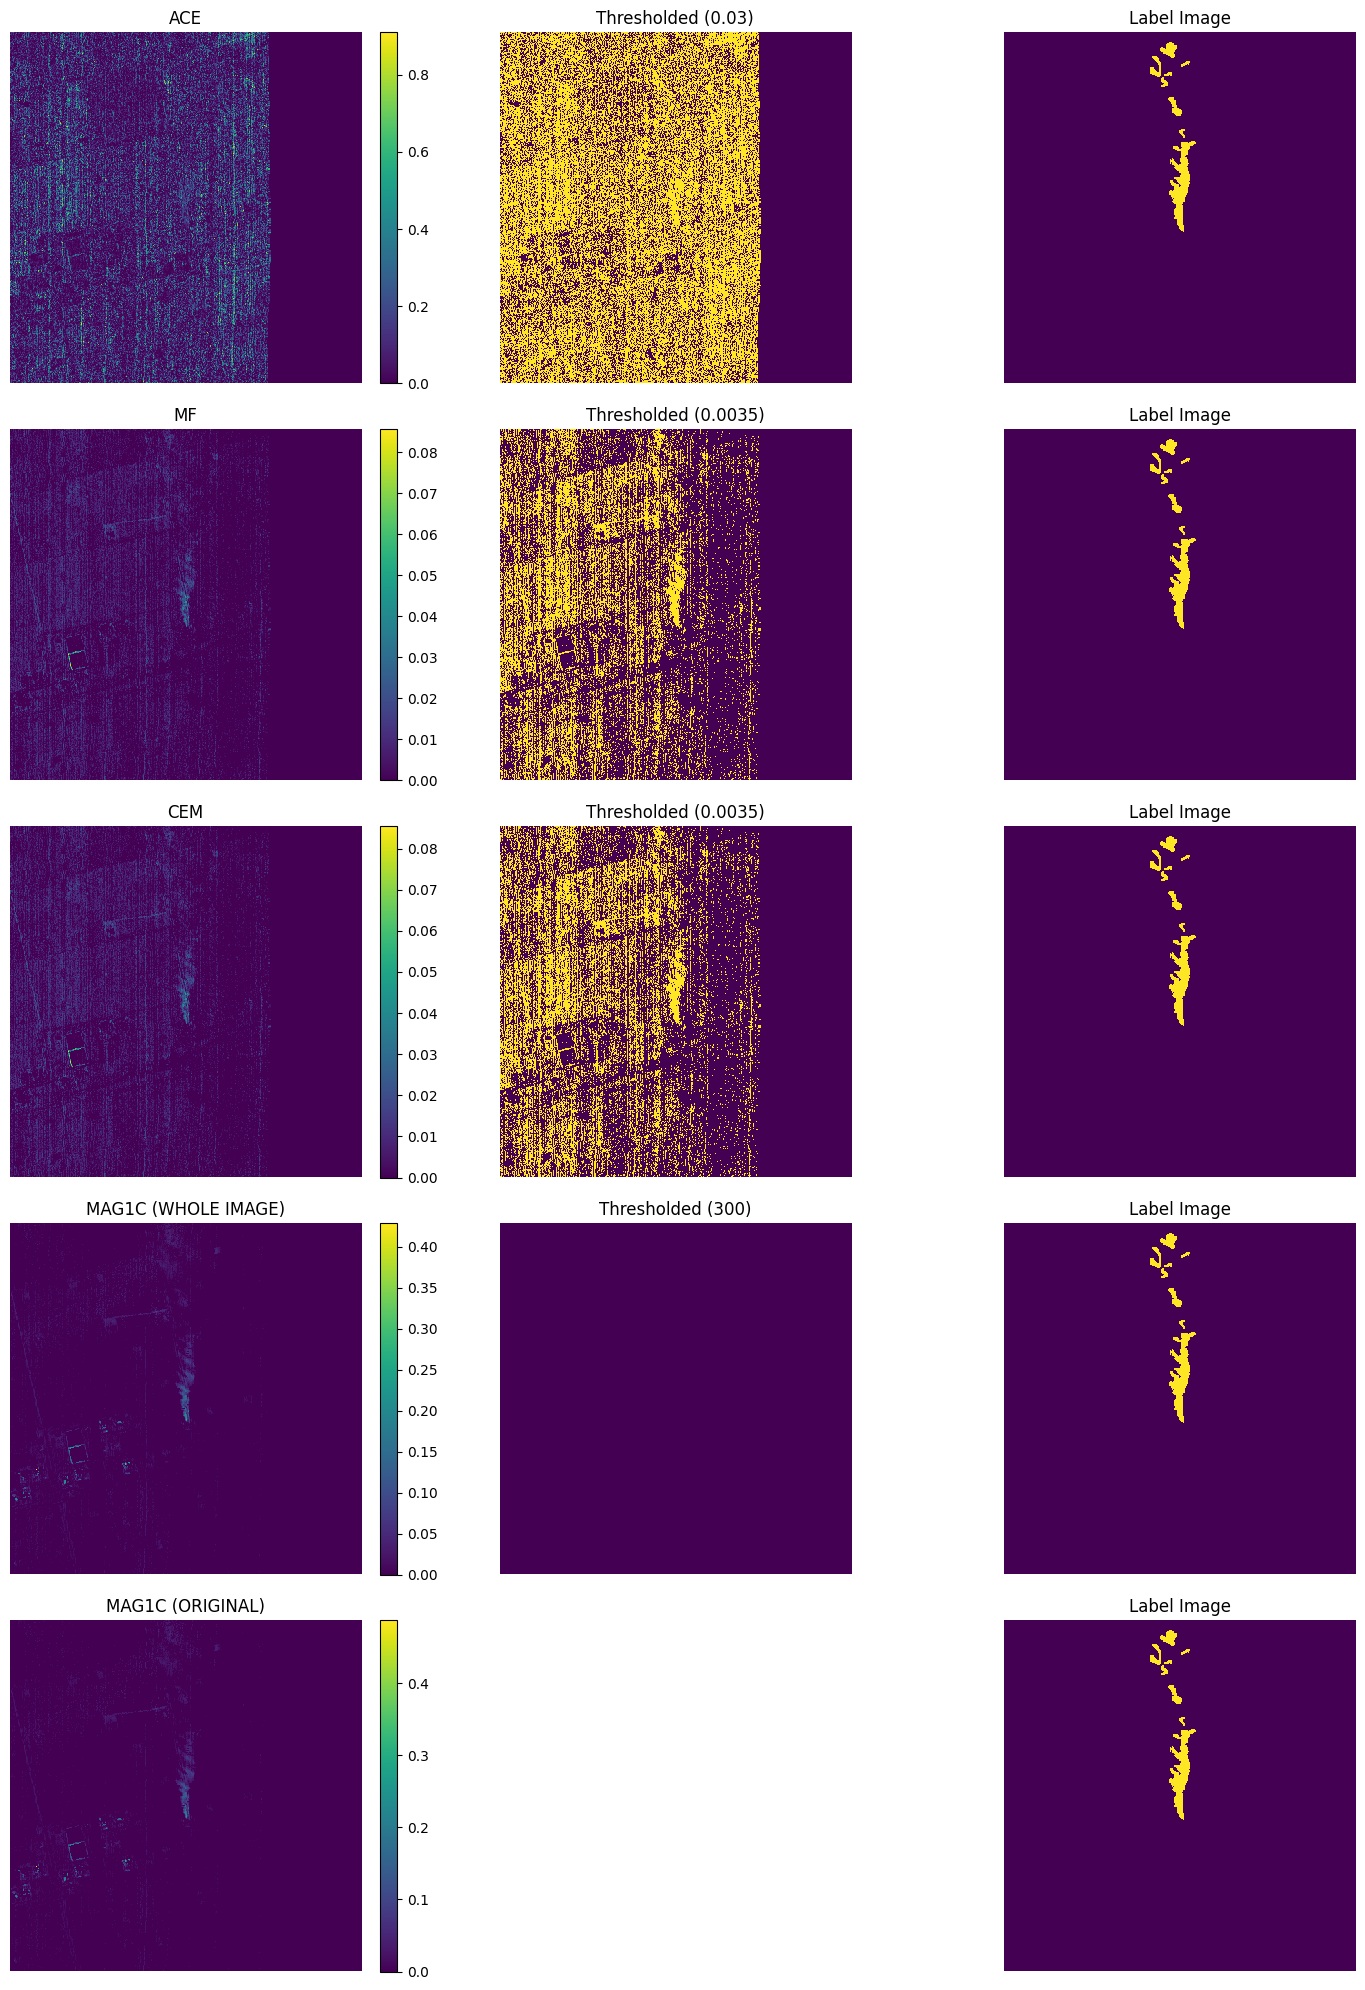

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

# Paths to folders
evenly_spaced = "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.05_SPED-UP_PRECISION-64_450-2490_SELECT-EVENLY-SPACED_CHANNEL-N-10"
highest_transmittance = "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.05_SPED-UP_PRECISION-64_450-2490_SELECT-HIGHEST-TRANSMITTANCE_CHANNEL-N-10"
hihgest_variance = "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.05_SPED-UP_PRECISION-64_450-2490_SELECT-HIGHEST-VARIANCE_CHANNEL-N-10"
# Filenames to process
filenames = ["ace.tif", "mf.tif", "cem.tif", "mag1c_tile_sampled-0.05.tif", "mag1c_tile.tif"]  # Last one from original

# Thresholds for each product (empirically chosen)
thresholds = {
    "ace.tif": 0.03,
    "mf.tif": 0.0035,
    "cem.tif": 0.0035,
    "mag1c_tile_sampled-0.05.tif": 300,
}

# Get all subfolders in the whole image path
subfolders = [f for f in os.listdir(whole_image) if os.path.isdir(os.path.join(whole_image, f))]

# Select subfolder based on index_to_plot
index_to_plot =3
if index_to_plot >= len(subfolders):
    raise ValueError(f"Index {index_to_plot} is out of range. Only {len(subfolders)} subfolders available.")

subfolder = subfolders[index_to_plot]
subfolder = "ang20191018t144405_r2674_c436_w151_h151"
print(f"Plotting for subfolder: {subfolder}")

# Create figure with 5 rows and 3 columns
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Loop through all specified filenames
for row_idx, filename in enumerate(filenames):
    # Determine file paths
    if row_idx == 4:  # Last mag1c.npy from original folder
        file_whole = os.path.join(original, subfolder, filename)
    else:
        file_whole = os.path.join(whole_image, subfolder, filename)
    
    file_label = os.path.join(whole_image, subfolder, "labelbinary.tif")  # Label remains the same

    # Load data
    data_whole = tiff.imread(file_whole) if os.path.exists(file_whole) else None
    data_label = tiff.imread(file_label) if os.path.exists(file_label) else None

    # Plot Whole Image
    if data_whole is not None:
        title = filename.replace(".tif", "").upper()
        if row_idx == 3:
            title = "MAG1C (WHOLE IMAGE)"
            data_whole /= 1e5
        if row_idx == 4:
            title = "MAG1C (ORIGINAL)"
            data_whole /= 1e5
        
        im = axes[row_idx, 0].imshow(np.clip(data_whole,0,None), cmap='viridis', interpolation='nearest')
        axes[row_idx, 0].set_title(title)
        fig.colorbar(im, ax=axes[row_idx, 0], fraction=0.046, pad=0.04)  # Add colorbar

    # Plot Thresholded Image
    if data_whole is not None and filename in thresholds:
        axes[row_idx, 1].imshow(data_whole > thresholds[filename], cmap='viridis', interpolation='nearest')
        axes[row_idx, 1].set_title(f"Thresholded ({thresholds[filename]})")

    # Plot Label Image
    if data_label is not None:
        axes[row_idx, 2].imshow(data_label, cmap='viridis', interpolation='nearest')
        axes[row_idx, 2].set_title("Label Image")

    # Remove axes ticks
    for col in range(3):
        axes[row_idx, col].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()


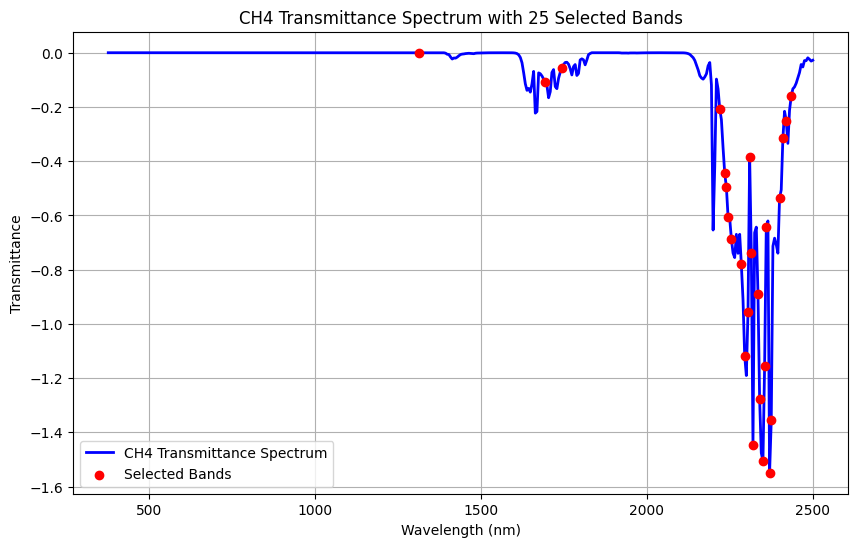

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the spectrum and wavelengths data
transmittance = np.load('aviris_mag1c_spectrum.npy')  # CH4 transmittance
wavelengths = np.load('aviris_mag1c_centers.npy')     # Corresponding wavelengths

def select_the_bands_by_transmittance(wavelengths, ch4_transmittance, N, strategy):
    """
    Selects N bands based on CH4 transmittance using different strategies.
    Strategy: Select bands to maximize the variance/coverage of CH4 transmittance.
    """
    # Ensure wavelengths and transmittance have the same length
    if len(wavelengths) != len(ch4_transmittance):
        raise ValueError("Wavelengths and transmittance must have the same length.")
    
    # Strategy to select bands with maximal variance between them
    selected_indices = [np.argmax(ch4_transmittance)]  # Start with the index of the highest transmittance
    
    # Now, iteratively select the next N-1 bands
    for _ in range(N - 1):
        remaining_indices = [i for i in range(len(ch4_transmittance)) if i not in selected_indices]
        
        # For each remaining band, calculate the minimum difference in transmittance with the selected bands
        variances = []
        for i in remaining_indices:
            min_diff = np.min(np.abs(ch4_transmittance[selected_indices] - ch4_transmittance[i]))
            variances.append(min_diff)
        
        # Select the band with the maximum minimum difference
        max_variance_index = remaining_indices[np.argmax(variances)]
        selected_indices.append(max_variance_index)
    
    # Sort the selected indices to return the results in order of wavelengths
    selected_indices = np.array(selected_indices)
    
    # Return the selected wavelengths and their corresponding transmittance values
    selected_wavelengths = wavelengths[selected_indices]
    selected_transmittance = ch4_transmittance[selected_indices]
    
    return selected_wavelengths, selected_transmittance


# Select 25 bands using the strategy
N = 25
selected_wavelengths, selected_transmittance = select_the_bands_by_transmittance(wavelengths, transmittance, N, strategy='highest_variance')

# Plotting the transmittance spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, transmittance, label='CH4 Transmittance Spectrum', color='blue', linewidth=2)

# Highlight the selected bands
plt.scatter(selected_wavelengths, selected_transmittance, color='red', label='Selected Bands', zorder=5)

# Add labels and title
plt.title(f'CH4 Transmittance Spectrum with {N} Selected Bands')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmittance')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

[ 460  550  640 1573 1578 1583 1588 1593 1598 1603 1608 1613 1618 1623
 1628 1633 1638 1643 1648 1653 1658 1663 1668 1673 1678 1683 1688 1693
 1699 2004 2009 2014 2019 2024 2029 2034 2039 2044 2049 2054 2059 2064
 2069 2074 2079 2084 2089 2094 2099 2104 2109 2114 2119 2124 2129 2134
 2139 2144 2149 2154 2159 2164 2169 2174 2179 2184 2189 2194 2199 2204
 2209 2214 2219 2224 2229 2234 2239 2244 2249 2254 2259 2264 2269 2275
 2280 2285 2290 2295 2300 2305 2310 2315 2320 2325 2330 2335 2340 2345
 2350 2355 2360 2365 2370 2375 2380 2385 2390 2395 2400 2405 2410 2415
 2420 2425 2430 2435 2440 2445 2450 2455 2460 2465 2470 2475 2480]
125
125
30


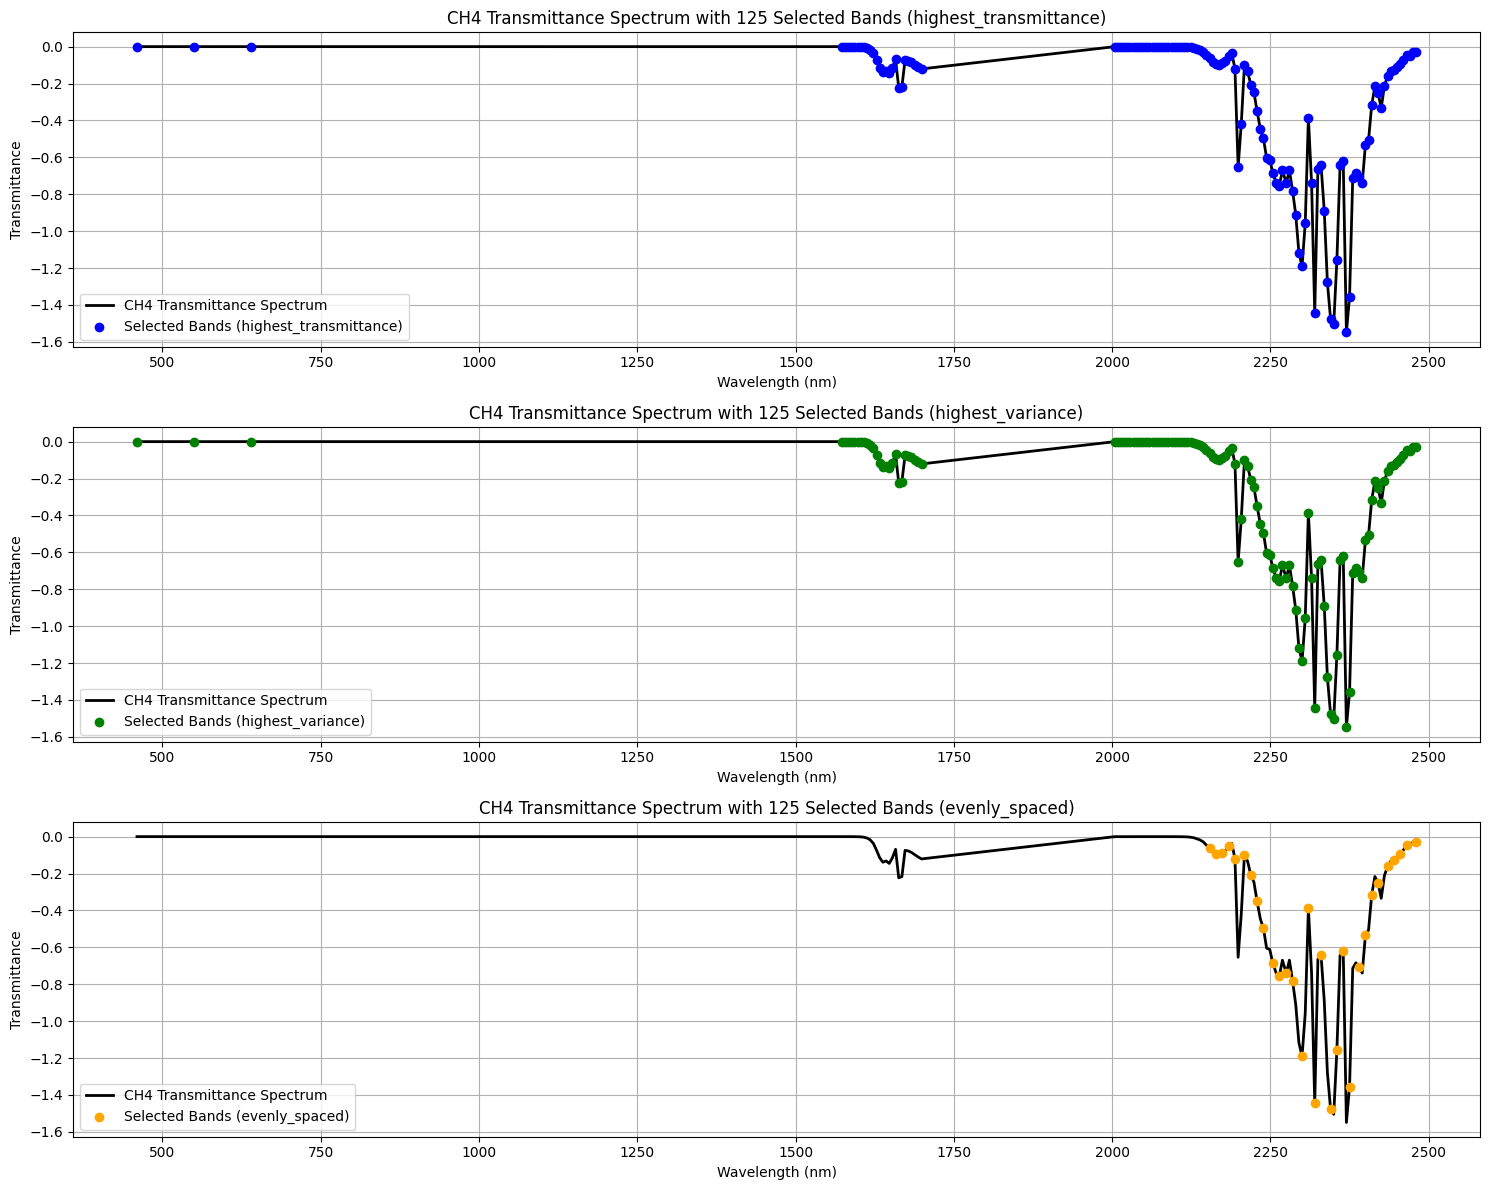

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the spectrum and wavelengths data
transmittance = np.load('starcop_spectrum.npy')  # CH4 transmittance
wavelengths = np.load('starcop_centers.npy')     # Corresponding wavelengths
print(wavelengths)
import numpy as np

from utils import select_the_bands_by_transmittance

# Set the number of bands to select
N = 125

# Apply all three strategies and get the selected bands
selected_wavelengths_transmittance = {
    'highest_transmittance': select_the_bands_by_transmittance(wavelengths, transmittance, N, 'highest-transmittance'),
    'highest_variance': select_the_bands_by_transmittance(wavelengths, transmittance, N, 'highest-variance'),
    'evenly_spaced': select_the_bands_by_transmittance(wavelengths, transmittance, 30, 'evenly-spaced')
}

# Plotting the transmittance spectrum for all strategies
plt.figure(figsize=(15, 12))

# Plot all strategies
strategies = ['highest_transmittance', 'highest_variance', 'evenly_spaced']
colors = ['blue', 'green', 'orange']

for idx, strategy in enumerate(strategies):
    selected_wavelengths, selected_transmittance = selected_wavelengths_transmittance[strategy]
    print(len(selected_wavelengths))
    
    plt.subplot(3, 1, idx + 1)  # 3 rows, 1 column, current subplot
    plt.plot(wavelengths, transmittance, label='CH4 Transmittance Spectrum', color='black', linewidth=2)
    plt.scatter(selected_wavelengths, selected_transmittance, color=colors[idx], label=f'Selected Bands ({strategy})', zorder=5)
    
    plt.title(f'CH4 Transmittance Spectrum with {N} Selected Bands ({strategy})')
    plt.xlabel('Wavelength (nm)')
    plt.ylabel('Transmittance')
    plt.legend()
    plt.grid(True)

# Display all plots
plt.tight_layout()
plt.show()

Plotting for subfolder: ang20191018t144405_r2674_c436_w151_h151


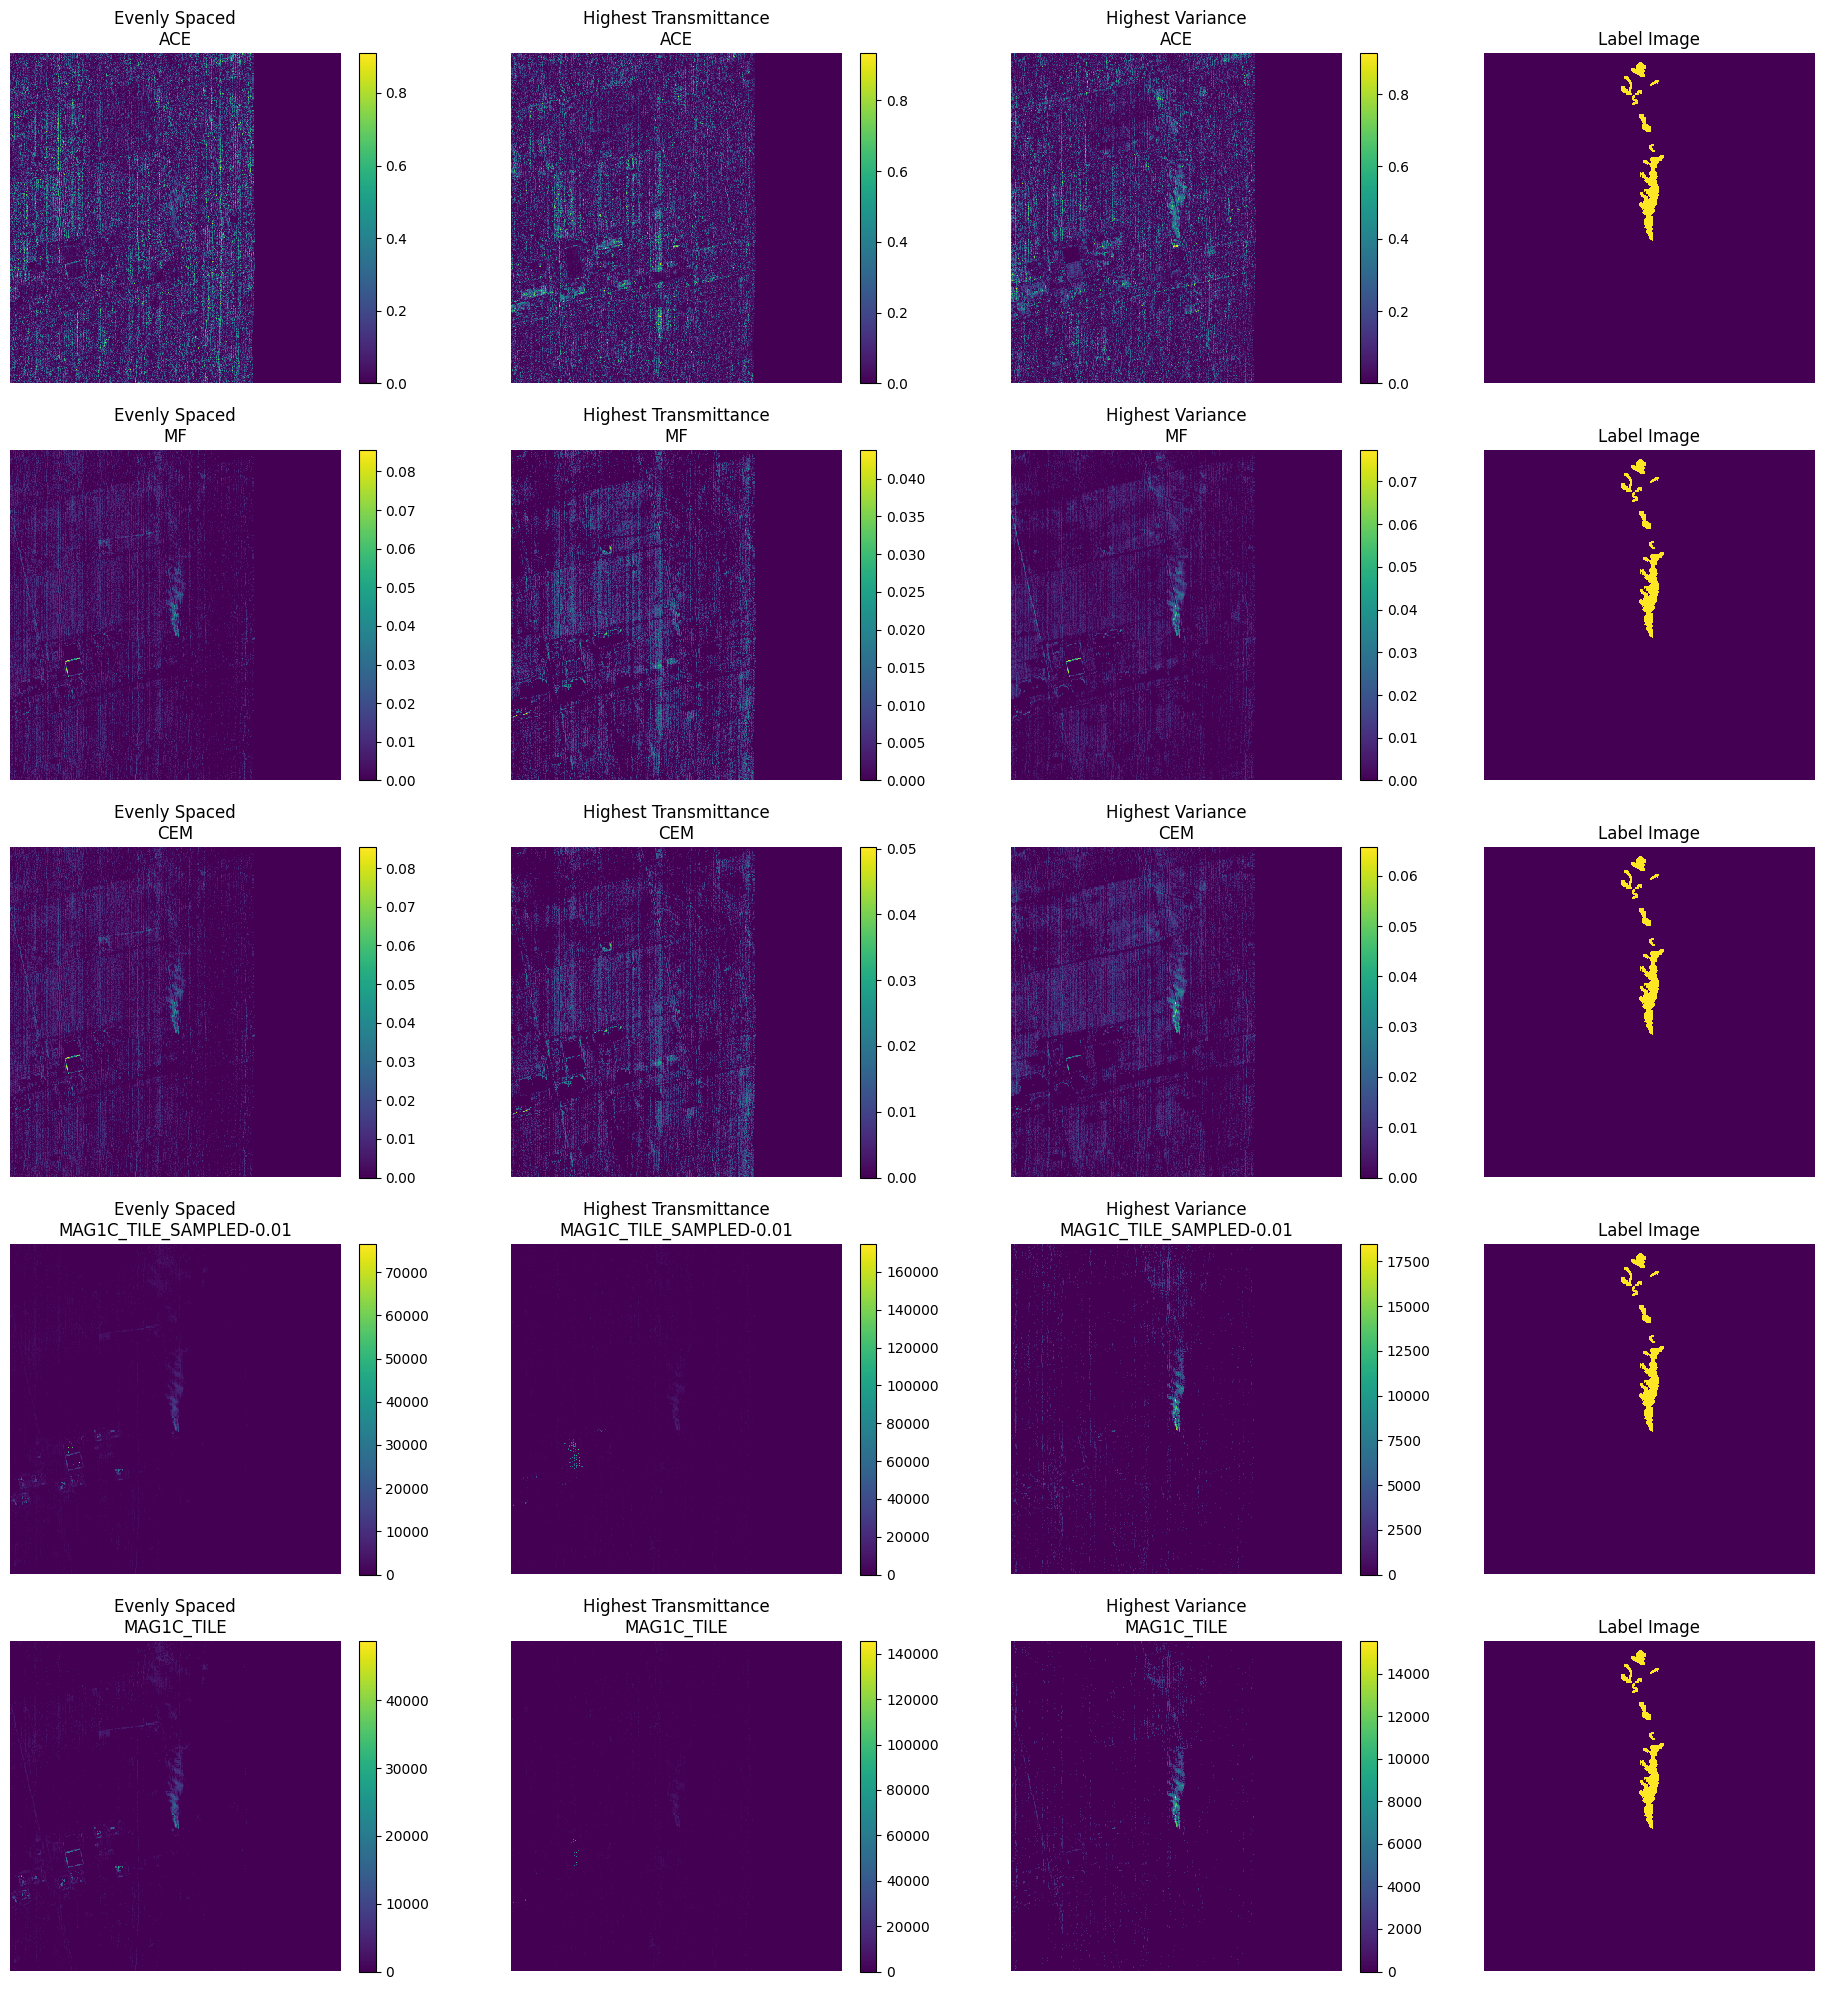

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

# Paths to datasets
datasets = {
    "Evenly Spaced": "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_200-2600_SELECT-EVENLY-SPACED_CHANNEL-N-10",
    "Highest Transmittance": "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_200-2600_SELECT-HIGHEST-TRANSMITTANCE_CHANNEL-N-10",
    "Highest Variance": "/home/jherec/methane-filters-benchmark/data/WHOLE-IMAGE_TILE-AND-SAMPLED-MAG1C-0.01_SPED-UP_PRECISION-64_200-2600_SELECT-HIGHEST-VARIANCE_CHANNEL-N-10"
}

# Filenames to process
filenames = ["ace.tif", "mf.tif", "cem.tif", "mag1c_tile_sampled-0.01.tif", "mag1c_tile.tif"]

# Subfolder selection
subfolder = "ang20191018t144405_r2674_c436_w151_h151"
print(f"Plotting for subfolder: {subfolder}")

# Create figure with 5 rows and 4 columns
fig, axes = plt.subplots(5, 4, figsize=(20, 20))

# Loop through all specified filenames
for row_idx, filename in enumerate(filenames):
    for col_idx, (dataset_name, dataset_path) in enumerate(datasets.items()):
        file_path = os.path.join(dataset_path, subfolder, filename)
        data = tiff.imread(file_path) if os.path.exists(file_path) else None
        
        if data is not None:
            
            im = axes[row_idx, col_idx].imshow(np.clip(data, 0, None), cmap='viridis', interpolation='nearest')
            axes[row_idx, col_idx].set_title(f"{dataset_name}\n{filename.replace('.tif', '').upper()}")
            fig.colorbar(im, ax=axes[row_idx, col_idx], fraction=0.046, pad=0.04)
        
        axes[row_idx, col_idx].axis("off")
    
    # Load and plot label image in the last column
    label_path = os.path.join(list(datasets.values())[0], subfolder, "labelbinary.tif")
    label_data = tiff.imread(label_path) if os.path.exists(label_path) else None
    if label_data is not None:
        axes[row_idx, 3].imshow(label_data, cmap='viridis', interpolation='nearest')
        axes[row_idx, 3].set_title("Label Image")
        axes[row_idx, 3].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..6.5588756].


(512, 512, 72)


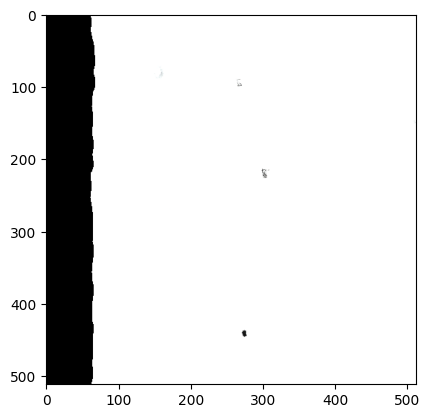

In [2]:
import numpy as np
import matplotlib.pyplot as plt

arr = np.load("test_tile.npy")
plt.imshow(arr[:,:,[0,1,2]])
print(arr.shape)